In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
from sklearn import datasets
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
sns.set()

# Modelado base

In [2]:
from sklearn import datasets

housing = datasets.fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

In [4]:
from sklearn.ensemble import RandomForestRegressor

def calc_predictions(X, y):

    df_results = pd.DataFrame(columns=['model_name', 'r2', 'mae', 'mse', 'rmse'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    models = [
        LinearRegression(),
        Lasso(),
        Ridge(),
        ElasticNet(),
        KNeighborsRegressor(),
        SVR(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()
    ]

    for model in models:
        # entrenamiento y predicciones
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # classification metrics
        model_name = model.__class__.__name__
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        # guardar resultados
        row = [model_name, r2, mae, mse, rmse]
        df_results.loc[len(df_results)] = row

    return df_results

In [5]:
calc_predictions(X,y)

,model_name,r2,mae,mse,rmse
0,LinearRegression,0.591051,0.529696,0.541129,0.735615
1,Lasso,0.285485,0.764450,0.945460,0.972347
2,Ridge,0.591113,0.529701,0.541047,0.735559
3,ElasticNet,0.422418,0.676394,0.764266,0.874223
4,KNeighborsRegressor,0.144342,0.818857,1.132222,1.064059
5,SVR,-0.022166,0.867421,1.352549,1.162991
6,DecisionTreeRegressor,0.601638,0.465510,0.527119,0.726030
7,RandomForestRegressor,0.807378,0.328746,0.254880,0.504857
8,AdaBoostRegressor,0.483944,0.702705,0.682855,0.826350
9,GradientBoostingRegressor,0.781387,0.370990,0.289273,0.537841


# Outliers

Eliminar valores anómalos

https://scikit-learn.org/stable/modules/outlier_detection.html#overview-of-outlier-detection-methods

## 1. IsolationForest

In [6]:
from sklearn.ensemble import IsolationForest

X = housing.data
y = housing.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# iso = IsolationForest(contamination=0.01) # 0 a 0.5
iso = IsolationForest()
y_outliers = iso.fit_predict(X)
y_outliers

array([ 1,  1, -1, ...,  1,  1,  1])

In [7]:
filter = y_outliers != -1
X_wo, y_wo = X[filter, :], y[filter]
print("X shape: ", X.shape)
print("X_wo shape: ", X_wo.shape)
print("Outliers borrados: ", X.shape[0] - X_wo.shape[0])

X shape:  (20640, 8)
X_wo shape:  (19131, 8)
Outliers borrados:  1509


In [8]:
calc_predictions(X_wo, y_wo)

,model_name,r2,mae,mse,rmse
0,LinearRegression,0.670990,0.477995,0.406526,0.637594
1,Lasso,0.191402,0.787018,0.999106,0.999553
2,Ridge,0.671024,0.477977,0.406483,0.637561
3,ElasticNet,0.386360,0.680964,0.758216,0.870756
4,KNeighborsRegressor,0.113093,0.804766,1.095866,1.046836
5,SVR,-0.012973,0.834310,1.251633,1.118764
6,DecisionTreeRegressor,0.577660,0.449682,0.521844,0.722388
7,RandomForestRegressor,0.810517,0.317481,0.234125,0.483865
8,AdaBoostRegressor,0.510607,0.643516,0.604695,0.777622
9,GradientBoostingRegressor,0.783569,0.364611,0.267423,0.517129


## 2. Minimum Covariance Detection (MCD)

In [9]:
from sklearn.covariance import EllipticEnvelope

X = housing.data
y = housing.target

# mcd = EllipticEnvelope()
mcd = EllipticEnvelope(contamination=0.01)
y_outliers = mcd.fit_predict(X)

filter = y_outliers != -1
X_wo, y_wo = X[filter, :], y[filter]

print("X shape: ", X.shape)
print("X_wo shape: ", X_wo.shape)
print("Outliers borrados: ", X.shape[0] - X_wo.shape[0])

calc_predictions(X_wo, y_wo)

X shape:  (20640, 8)
X_wo shape:  (20433, 8)
Outliers borrados:  207


,model_name,r2,mae,mse,rmse
0,LinearRegression,0.659705,0.494676,0.466809,0.683234
1,Lasso,0.278898,0.781732,0.989191,0.994581
2,Ridge,0.659699,0.494698,0.466816,0.683240
3,ElasticNet,0.418888,0.690063,0.797155,0.892835
4,KNeighborsRegressor,0.169225,0.819341,1.139636,1.067538
5,SVR,-0.019145,0.883791,1.398038,1.182387
6,DecisionTreeRegressor,0.644325,0.443205,0.487907,0.698503
7,RandomForestRegressor,0.821802,0.322255,0.244447,0.494416
8,AdaBoostRegressor,0.455812,0.743667,0.746504,0.864004
9,GradientBoostingRegressor,0.790545,0.371631,0.287326,0.536028


## 3. Local Outlier Factor (LOF)

In [10]:
from sklearn.neighbors import LocalOutlierFactor

X = housing.data
y = housing.target

lof = LocalOutlierFactor()
# lof = LocalOutlierFactor(n_neighbors=30)
y_outliers = lof.fit_predict(X)

filter = y_outliers != -1
X_wo, y_wo = X[filter, :], y[filter]

print("X shape: ", X.shape)
print("X_wo shape: ", X_wo.shape)
print("Outliers borrados: ", X.shape[0] - X_wo.shape[0])

calc_predictions(X_wo, y_wo)

X shape:  (20640, 8)
X_wo shape:  (20470, 8)
Outliers borrados:  170


,model_name,r2,mae,mse,rmse
0,LinearRegression,0.627708,0.517103,0.494543,0.703237
1,Lasso,0.260803,0.779583,0.981928,0.990923
2,Ridge,0.627688,0.517129,0.494570,0.703256
3,ElasticNet,0.411445,0.686278,0.781820,0.884206
4,KNeighborsRegressor,0.127956,0.830551,1.158399,1.076290
5,SVR,-0.017956,0.866812,1.352225,1.162852
6,DecisionTreeRegressor,0.606239,0.455604,0.523062,0.723230
7,RandomForestRegressor,0.815818,0.323962,0.244662,0.494633
8,AdaBoostRegressor,0.405879,0.766418,0.789214,0.888377
9,GradientBoostingRegressor,0.795340,0.364096,0.271865,0.521407


## 4. One-Class SVM

In [11]:
from sklearn.svm import OneClassSVM

X = housing.data
y = housing.target

# one = OneClassSVM()
one = OneClassSVM(nu=0.005) # (0, 1]
y_outliers = one.fit_predict(X)

filter = y_outliers != -1
X_wo, y_wo = X[filter, :], y[filter]

print("X shape: ", X.shape)
print("X_wo shape: ", X_wo.shape)
print("Outliers borrados: ", X.shape[0] - X_wo.shape[0])

calc_predictions(X_wo, y_wo)

X shape:  (20640, 8)
X_wo shape:  (20536, 8)
Outliers borrados:  104


,model_name,r2,mae,mse,rmse
0,LinearRegression,0.632268,0.510527,0.489698,0.699784
1,Lasso,0.284842,0.768557,0.952356,0.975887
2,Ridge,0.632262,0.510536,0.489707,0.699791
3,ElasticNet,0.423938,0.679923,0.767125,0.875857
4,KNeighborsRegressor,0.140358,0.824551,1.144761,1.069935
5,SVR,-0.018575,0.870298,1.356409,1.164650
6,DecisionTreeRegressor,0.626444,0.454239,0.497454,0.705304
7,RandomForestRegressor,0.812218,0.328405,0.250064,0.500064
8,AdaBoostRegressor,0.437862,0.748387,0.748584,0.865208
9,GradientBoostingRegressor,0.799140,0.359425,0.267480,0.517185


## 5. Rango intercuartílico

In [12]:
from collections import Counter
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [13]:
housing = datasets.fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
df.shape

(20640, 9)

In [14]:
outliers = detect_outliers(df, 2, df.drop('MedHouseVal', axis=1).columns)

In [15]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
df.loc[outliers]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1566,15.0001,2.0,22.222222,2.222222,25.0,2.777778,37.74,-121.96,3.50000
1617,11.7064,17.0,9.361702,1.127660,1722.0,12.212766,37.84,-122.08,5.00001
1645,13.2949,4.0,9.104216,1.077963,3898.0,3.101034,37.82,-121.89,5.00001
2826,10.0263,52.0,9.625000,1.750000,37.0,2.312500,35.42,-119.11,2.00000
4352,15.0001,37.0,8.659574,1.425532,100.0,2.127660,34.10,-118.37,5.00001
6226,9.7066,38.0,8.750000,1.100000,129.0,6.450000,34.07,-117.92,1.82500
6399,15.0001,35.0,8.586207,1.068966,268.0,9.241379,34.13,-118.04,5.00001
9026,8.0144,16.0,8.191860,1.418605,970.0,5.639535,34.07,-118.86,5.00001
9811,14.4113,28.0,11.634686,1.509225,569.0,2.099631,36.57,-121.94,5.00001
10405,10.9704,6.0,10.558140,2.372093,213.0,4.953488,33.69,-117.53,4.83300


In [17]:
df = df.drop(outliers, axis=0).reset_index(drop=True)

In [18]:
df.shape

(20598, 9)

In [19]:
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']
calc_predictions(X, y)

,model_name,r2,mae,mse,rmse
0,LinearRegression,0.617080,0.529739,0.515090,0.717697
1,Lasso,0.280092,0.775100,0.968393,0.984069
2,Ridge,0.617070,0.529751,0.515103,0.717707
3,ElasticNet,0.425982,0.681929,0.772147,0.878719
4,KNeighborsRegressor,0.140048,0.829387,1.156774,1.075535
5,SVR,-0.020025,0.873329,1.372099,1.171366
6,DecisionTreeRegressor,0.636551,0.447833,0.488898,0.699212
7,RandomForestRegressor,0.814699,0.327074,0.249261,0.499260
8,AdaBoostRegressor,0.396963,0.788645,0.811183,0.900657
9,GradientBoostingRegressor,0.790059,0.368033,0.282405,0.531418


# Escalado

In [20]:
# housing = datasets.fetch_california_housing()
# df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [21]:
df = pd.read_csv("../data/sonar.csv")
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [22]:
X = df.values[:, :-1]
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [23]:
y = df.values[:, -1]
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [24]:
from sklearn.preprocessing import LabelEncoder

# pasar y de categórico a numérico.
# OrdinalEncoder se utiliza en las entradas (X)
# LabelEncoder se utiliza en la salida (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

model = KNeighborsClassifier()
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(model, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))
accuracy_base = cv_results.mean()

Accuracy: mean(0.7986), std(0.0925)


## MinMaxScaler

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

scaler = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8271), std(0.0986)


In [27]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

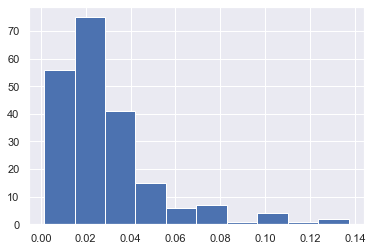

In [28]:
df['Freq_1'].hist()

In [29]:
# sin pipeline
X, y = df.values[:, :-1], df.values[:, -1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,...,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,...,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,...,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,...,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,...,0.207420,0.227175,0.374026,0.394737,0.260771,0.260897,0.287642,0.229977,0.281680,0.183025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

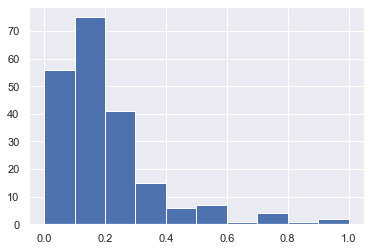

In [30]:
pd.DataFrame(X_scaled)[0].hist()

## StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

scaler = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8124), std(0.1105)


In [32]:
# sin pipeline
X, y = df.values[:, :-1], df.values[:, -1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,...,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02,2.080000e+02
mean,-4.190024e-17,1.663333e-16,-9.661075e-17,1.627971e-16,-1.297039e-16,2.017617e-16,9.607699e-17,1.271019e-17,-3.339343e-16,2.268485e-17,...,3.736327e-18,1.316388e-16,-1.387779e-17,-1.793437e-16,8.433425e-17,-2.199096e-16,4.590345e-17,-7.686159e-17,1.283695e-16,3.149190e-17
std,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,...,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00,1.002413e+00
min,-1.206158e+00,-1.150725e+00,-1.104253e+00,-1.036115e+00,-1.236093e+00,-1.600493e+00,-1.921613e+00,-1.522110e+00,-1.443689e+00,-1.468833e+00,...,-1.341343e+00,-1.313126e+00,-1.449472e+00,-1.364897e+00,-1.229092e+00,-1.366868e+00,-1.302971e+00,-1.185113e+00,-1.271603e+00,-1.176985e+00
25%,-6.894939e-01,-6.686781e-01,-6.490624e-01,-6.359298e-01,-6.703975e-01,-6.367565e-01,-6.626732e-01,-6.400918e-01,-6.856590e-01,-7.232644e-01,...,-6.380641e-01,-6.394049e-01,-7.999231e-01,-7.642025e-01,-7.270112e-01,-6.678488e-01,-7.138771e-01,-6.738235e-01,-6.918580e-01,-6.788714e-01
50%,-2.774703e-01,-2.322506e-01,-2.486515e-01,-2.120457e-01,-2.292089e-01,-2.106432e-01,-2.400524e-01,-2.672134e-01,-2.180558e-01,-1.928459e-01,...,-1.810370e-01,-2.102002e-01,-1.645716e-01,-2.252935e-01,-2.532164e-01,-2.396997e-01,-3.240352e-01,-3.329639e-01,-2.499546e-01,-2.405314e-01
75%,2.784345e-01,2.893335e-01,3.682681e-01,2.285353e-01,4.524231e-01,5.012417e-01,5.232608e-01,4.096773e-01,4.692723e-01,4.507410e-01,...,3.970293e-01,3.438640e-01,5.950106e-01,4.886751e-01,3.973675e-01,4.112618e-01,4.513169e-01,3.719959e-01,3.865486e-01,4.020352e-01
max,4.706053e+00,5.944643e+00,6.836142e+00,8.025419e+00,5.878863e+00,4.710224e+00,4.074573e+00,3.816498e+00,4.274237e+00,3.746234e+00,...,7.039574e+00,5.980752e+00,4.016680e+00,3.330819e+00,5.008027e+00,5.448568e+00,4.795888e+00,5.585599e+00,4.615037e+00,7.450343e+00


<AxesSubplot:>

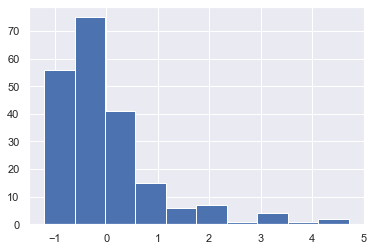

In [33]:
pd.DataFrame(X_scaled)[0].hist()

## RobustScaler

In [34]:
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

# scaler = RobustScaler()
scaler = RobustScaler(quantile_range=(25.0, 75.0))
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8271), std(0.0932)


## Scaler y train_test_split

In [35]:
# scaler.fit_transform(X_train)
# scaler.transform(X_test)

In [36]:
# scaler.fit(X_train)
# scaler.transform(X_train)
# scaler.transform(X_test)

# Normalizar

In [37]:
from sklearn.preprocessing import Normalizer

X = [[4, 1, 2, 3],
    [1, 3, 9, 3],
    [5, 7, 5, 1]]

normalizer = Normalizer()
normalizer.fit_transform(X)

array([[0.73029674, 0.18257419, 0.36514837, 0.54772256],
       [0.1       , 0.3       , 0.9       , 0.3       ],
       [0.5       , 0.7       , 0.5       , 0.1       ]])

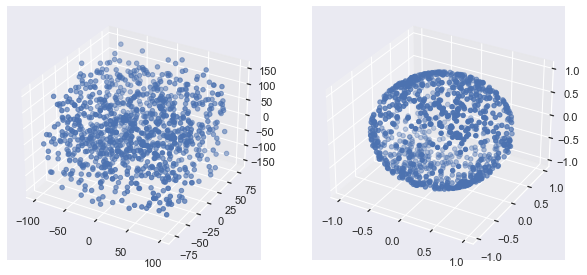

In [38]:
df = pd.DataFrame({
    'x': np.random.randint(-100, 100, 1000).astype(float),
    'y': np.random.randint(-80, 80, 1000).astype(float),
    'z': np.random.randint(-150, 150, 1000).astype(float),
})

normalizer = Normalizer()
df_scaled = normalizer.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns) # Importante, recuperamos los nombres de columna

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df['x'], df['y'], df['z'])
ax2.scatter(df_scaled['x'], df_scaled['y'], df_scaled['z'])

In [39]:
df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)


scaler = Normalizer()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.7845), std(0.1223)


# Missing values

In [40]:
df = pd.read_csv('../data/student-por.csv', sep=';')
df.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,NaN,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,NaN,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,NaN,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,NaN,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,NaN,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,NaN,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,NaN,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,NaN,5,1,1,1,5,0,12,12,13


In [41]:
df.isnull().sum()

school          0
sex             0
age            11
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel        461
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

In [42]:
df.shape

(649, 33)

### Borrar feature

In [43]:
df = df.drop('famrel', axis=1)
# df.drop('famrel', axis=1, inplace=True)

### Ajustar NaN

In [44]:
df.age = df.age.apply(lambda value: np.nan if value == '?' else value)

In [45]:
# crear copia para probar distintos imputers:
df_simple = df.copy()
df_knn = df.copy()
df_iter = df.copy()

### SimpleImputer

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df_simple_age = pd.DataFrame(df_simple['age']) # 2 dimensiones

imputer.fit(df_simple_age)
df_simple['age'] = imputer.transform(df_simple_age)
df_simple['age'] = df_simple['age'].astype(int)
df_simple.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,1,1,1,5,0,12,12,13


In [47]:
# Verificar que ahora la columna age tiene 0 nulos:
df_simple.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### KNNImputer

In [48]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
# imputer = KNNImputer(n_neighbors=30)
df_knn_age = pd.DataFrame(df_knn['age']) # 2 dimensiones

imputer.fit(df_knn_age)
df_knn['age'] = imputer.transform(df_knn_age)
df_knn['age'] = df_knn['age'].astype(int)
df_knn.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,1,1,1,5,0,12,12,13


### IterativeImputer

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df_iter_age = pd.DataFrame(df_iter['age']) # 2 dimensiones

imputer.fit(df_iter_age)
df_iter['age'] = imputer.transform(df_iter_age)
df_iter['age'] = df_iter['age'].astype(int)
df_iter.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,1,1,1,5,0,12,12,13


# Transformar distribuciones

## QuantileTransformer

(array([441., 266., 118.,  72.,  33.,  20.,  11.,   9.,   7.,   8.,   3.,
          1.,   4.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,
          1.,   0.,   1.]),
 array([ 0.0527033 ,  0.88363644,  1.71456958,  2.54550273,  3.37643587,
         4.20736901,  5.03830215,  5.86923529,  6.70016844,  7.53110158,
         8.36203472,  9.19296786, 10.023901  , 10.85483415, 11.68576729,
        12.51670043, 13.34763357, 14.17856671, 15.00949985, 15.840433  ,
        16.67136614, 17.50229928, 18.33323242, 19.16416556, 19.99509871,
        20.82603185]),
 <BarContainer object of 25 artists>)

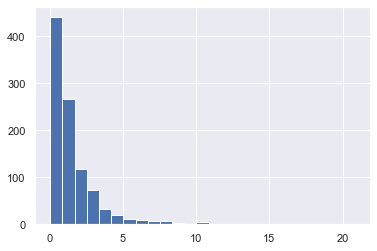

In [96]:
from numpy import exp
from numpy.random import randn

data = randn(1000)
data = exp(data)

plt.hist(data, bins=25)

In [98]:
print(pd.DataFrame(data).skew()) # muy asimétrico
print(pd.DataFrame(data).kurtosis())

0    4.080453
dtype: float64
0    24.786042
dtype: float64


(array([  1.,   0.,   0.,   0.,   0.,   3.,   8.,  19.,  42.,  77., 117.,
        151., 164., 151., 117.,  77.,  42.,  19.,   8.,   3.,   0.,   0.,
          0.,   0.,   1.]),
 array([-5.19933758, -4.78339058, -4.36744357, -3.95149656, -3.53554956,
        -3.11960255, -2.70365554, -2.28770854, -1.87176153, -1.45581452,
        -1.03986752, -0.62392051, -0.2079735 ,  0.2079735 ,  0.62392051,
         1.03986752,  1.45581452,  1.87176153,  2.28770854,  2.70365554,
         3.11960255,  3.53554956,  3.95149656,  4.36744357,  4.78339058,
         5.19933758]),
 <BarContainer object of 25 artists>)

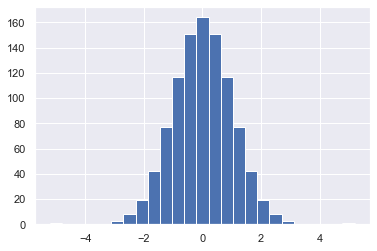

In [107]:
from sklearn.preprocessing import QuantileTransformer

data_tr = QuantileTransformer(output_distribution='normal').fit_transform(data.reshape(-1, 1))
plt.hist(data_tr, bins=25)

In [106]:
print(pd.DataFrame(data_tr).skew()) # muy asimétrico
print(pd.DataFrame(data_tr).kurtosis())

0   -0.019279
dtype: float64
0    0.853793
dtype: float64


In [108]:
df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

transformer = QuantileTransformer(output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8460), std(0.0743)


array([[<AxesSubplot:title={'center':'Freq_1'}>,
        <AxesSubplot:title={'center':'Freq_2'}>,
        <AxesSubplot:title={'center':'Freq_3'}>,
        <AxesSubplot:title={'center':'Freq_4'}>,
        <AxesSubplot:title={'center':'Freq_5'}>,
        <AxesSubplot:title={'center':'Freq_6'}>,
        <AxesSubplot:title={'center':'Freq_7'}>,
        <AxesSubplot:title={'center':'Freq_8'}>],
       [<AxesSubplot:title={'center':'Freq_9'}>,
        <AxesSubplot:title={'center':'Freq_10'}>,
        <AxesSubplot:title={'center':'Freq_11'}>,
        <AxesSubplot:title={'center':'Freq_12'}>,
        <AxesSubplot:title={'center':'Freq_13'}>,
        <AxesSubplot:title={'center':'Freq_14'}>,
        <AxesSubplot:title={'center':'Freq_15'}>,
        <AxesSubplot:title={'center':'Freq_16'}>],
       [<AxesSubplot:title={'center':'Freq_17'}>,
        <AxesSubplot:title={'center':'Freq_18'}>,
        <AxesSubplot:title={'center':'Freq_19'}>,
        <AxesSubplot:title={'center':'Freq_20'}>,
       

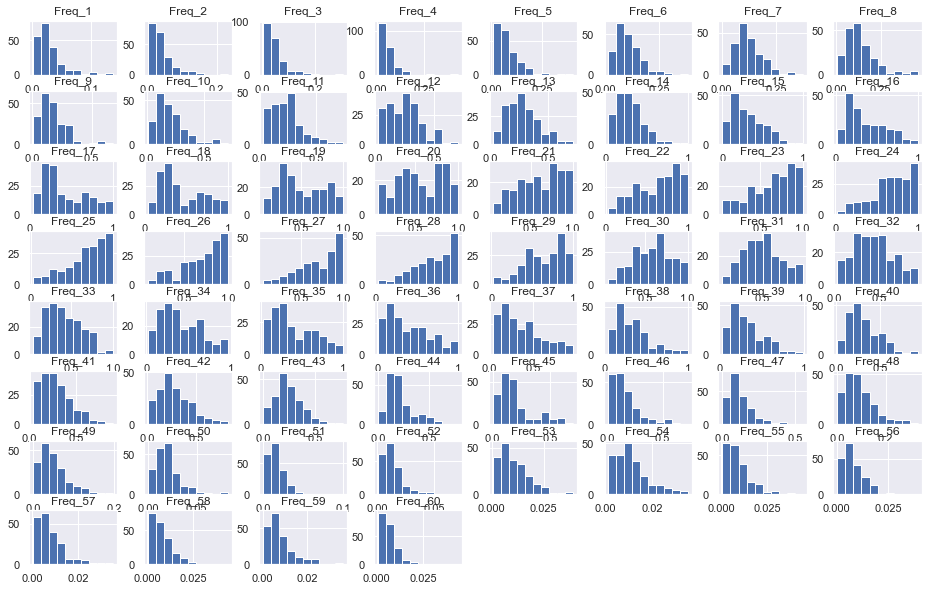

In [109]:
df.hist(figsize=(16, 10))

C:\Users\alanj\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (208). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

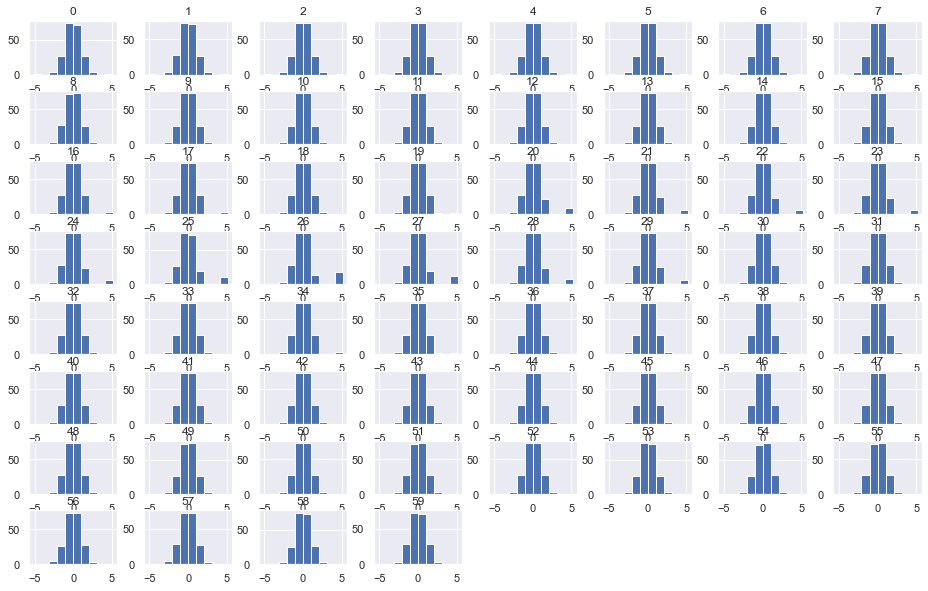

In [111]:
# sin pipeline
X, y = df.values[:, :-1], df.values[:, -1]
transformer = QuantileTransformer(output_distribution='normal')
X_tr = transformer.fit_transform(X)
pd.DataFrame(X_tr).hist(figsize=(16, 10))

In [125]:
# sesgo de cada columna en el dataset sonar:
pd.DataFrame(X).skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

In [126]:
pd.DataFrame(X).kurtosis()

0      5.590145
1      7.091235
2     11.669560
3     20.736121
4      7.044579
5      2.572759
6      1.461410
7      2.802407
8      3.592943
9      1.820620
10     1.190935
11     0.036247
12     0.400126
13     1.576800
14     0.024567
15    -0.513149
16    -0.822584
17    -1.045141
18    -1.166215
19    -1.210104
20    -1.026724
21    -0.948883
22    -0.613532
23    -0.245873
24    -0.205343
25    -0.548768
26    -0.530026
27    -0.417756
28    -0.699993
29    -0.689771
30    -0.643969
31    -0.664265
32    -0.514710
33    -0.558206
34    -0.711456
35    -0.658919
36    -0.553239
37     0.623908
38     0.457845
39     0.761169
40     0.451796
41     0.532222
42     1.074928
43     1.416182
44     1.083385
45     3.065555
46     4.216863
47     1.848505
48     1.782252
49     4.402882
50    14.320998
51     7.006616
52     1.248923
53     0.935900
54     4.531085
55     5.367747
56     3.611717
57     6.762729
58     3.740889
59    14.740674
dtype: float64

In [127]:
pd.DataFrame(X_tr).skew()

0    -1.101393e-04
1    -5.643358e-04
2    -2.582112e-04
3     4.348598e-03
4    -2.370068e-04
5    -4.980451e-04
6    -4.960028e-04
7    -3.977628e-05
8     8.686799e-06
9    -2.332756e-07
10   -1.497587e-04
11   -2.588747e-06
12    2.291205e-04
13   -3.172646e-04
14   -3.117252e-04
15    1.843251e-05
16    8.908062e-01
17    6.607781e-01
18    1.910861e-07
19    3.673091e-01
20    1.461141e+00
21    1.209052e+00
22    1.316497e+00
23    1.316438e+00
24    1.316440e+00
25    1.541211e+00
26    1.581363e+00
27    1.564465e+00
28    1.398769e+00
29    1.209054e+00
30    2.210741e-07
31   -1.494747e-04
32   -7.834374e-07
33    1.409993e-06
34    6.607738e-01
35    3.673741e-01
36   -5.345902e-05
37    4.244534e-07
38    1.942671e-05
39   -7.649975e-07
40   -1.543243e-04
41    2.769127e-11
42    3.904507e-07
43    2.879639e-03
44    1.711505e-06
45    2.487670e-04
46    3.247789e-04
47   -3.467802e-06
48   -4.000748e-04
49   -1.029142e-03
50   -4.198080e-04
51   -6.663451e-04
52    1.5864

In [128]:
pd.DataFrame(X_tr).kurtosis()

0     3.650444
1     3.650882
2     3.651358
3     3.654092
4     3.646686
5     3.652412
6     3.651512
7     3.648945
8     3.650099
9     3.650046
10    3.650293
11    3.650065
12    3.654478
13    3.649643
14    3.649383
15    3.650130
16    5.587658
17    5.261626
18    3.650049
19    4.653944
20    5.281380
21    5.717228
22    5.625437
23    5.625294
24    5.625285
25    4.834204
26    3.428945
27    4.596117
28    5.473152
29    5.717238
30    3.650046
31    3.649487
32    3.650057
33    3.650058
34    5.261602
35    4.654760
36    3.647525
37    3.650051
38    3.650137
39    3.650054
40    3.649665
41    3.650040
42    3.650057
43    3.650544
44    3.650063
45    3.652643
46    3.650834
47    3.652225
48    3.655060
49    3.655351
50    3.653670
51    3.651665
52    3.654398
53    3.650831
54    3.655084
55    3.660128
56    3.674727
57    3.663270
58    3.681279
59    3.664244
dtype: float64

## PowerTransformer

### Yeo-Johnson

(array([645., 200.,  78.,  38.,  22.,   8.,   4.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([2.07069695e-02, 1.42686243e+00, 2.83301789e+00, 4.23917335e+00,
        5.64532881e+00, 7.05148427e+00, 8.45763973e+00, 9.86379520e+00,
        1.12699507e+01, 1.26761061e+01, 1.40822616e+01, 1.54884170e+01,
        1.68945725e+01, 1.83007280e+01, 1.97068834e+01, 2.11130389e+01,
        2.25191943e+01, 2.39253498e+01, 2.53315053e+01, 2.67376607e+01,
        2.81438162e+01, 2.95499716e+01, 3.09561271e+01, 3.23622826e+01,
        3.37684380e+01, 3.51745935e+01]),
 <BarContainer object of 25 artists>)

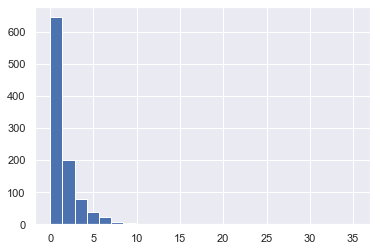

In [116]:
data = randn(1000)
data = exp(data)
plt.hist(data, bins=25)

In [117]:
print(pd.DataFrame(data).skew())  # muy asimétrico
print(pd.DataFrame(data).kurtosis())

0    6.289907
dtype: float64
0    84.474312
dtype: float64


(array([ 4., 14., 25., 36., 48., 55., 61., 50., 61., 62., 70., 82., 62.,
        49., 51., 47., 54., 48., 35., 34., 23., 20.,  6.,  2.,  1.]),
 array([-2.17535788, -1.98348689, -1.79161589, -1.5997449 , -1.4078739 ,
        -1.21600291, -1.02413191, -0.83226092, -0.64038993, -0.44851893,
        -0.25664794, -0.06477694,  0.12709405,  0.31896505,  0.51083604,
         0.70270703,  0.89457803,  1.08644902,  1.27832002,  1.47019101,
         1.662062  ,  1.853933  ,  2.04580399,  2.23767499,  2.42954598,
         2.62141698]),
 <BarContainer object of 25 artists>)

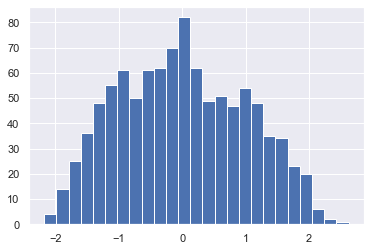

In [118]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

data_tr = PowerTransformer().fit_transform(data.reshape(-1, 1))
plt.hist(data_tr, bins=25)

In [119]:
print(pd.DataFrame(data_tr).skew())
print(pd.DataFrame(data_tr).kurtosis())

0    0.119252
dtype: float64
0   -0.822854
dtype: float64


In [130]:
df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

transformer = PowerTransformer()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(nan), std(nan)


C:\Users\alanj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alanj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alanj\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\alanj\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\alanj\anaconda3

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

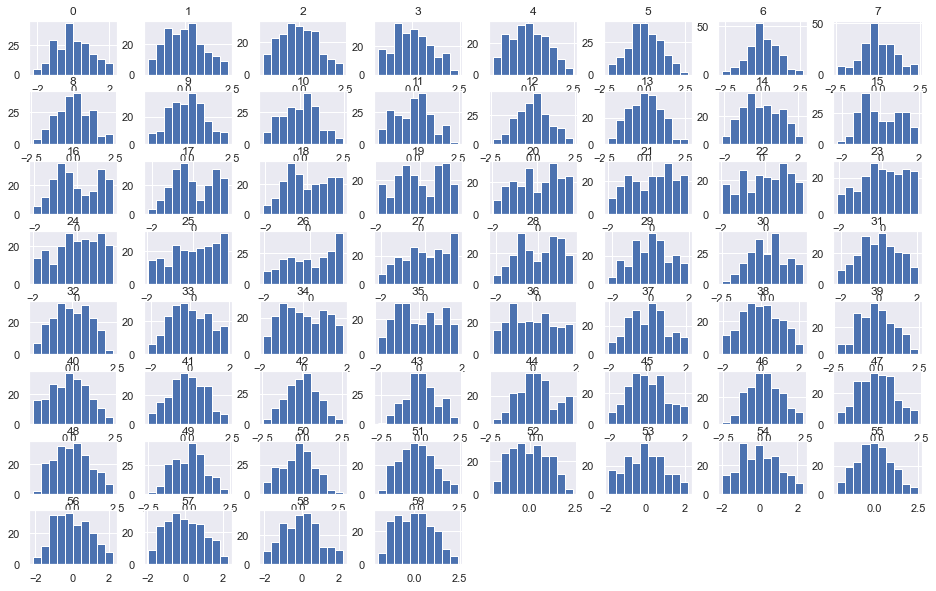

In [129]:
X, y = df.values[:, :-1], df.values[:, -1]
transformer = PowerTransformer()
X_tr = transformer.fit_transform(X)
pd.DataFrame(X_tr).hist(figsize=(16, 10))

### Box-cox

Esta transformación requiere como requisito que los datos de entrada sean positivos, por tanto en muchos casos será necesario escalarlos en un rango positivo con un scaler como por ejemplo MinMaxScaler.

In [141]:
df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

scaler = MinMaxScaler(feature_range=(1,4)) # Escalar para que los datos sean positivos
transformer = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('transformer', transformer),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8169), std(0.1256)


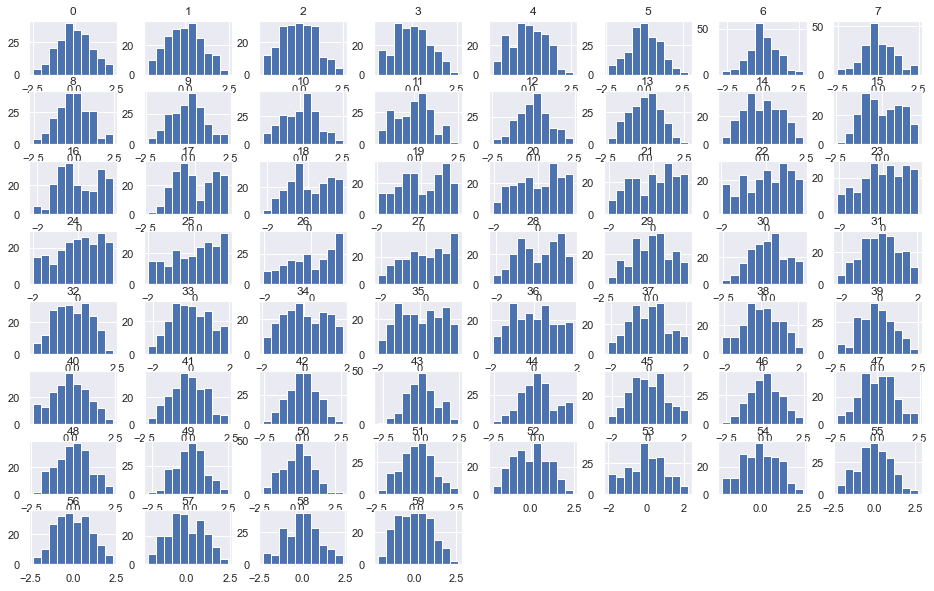

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

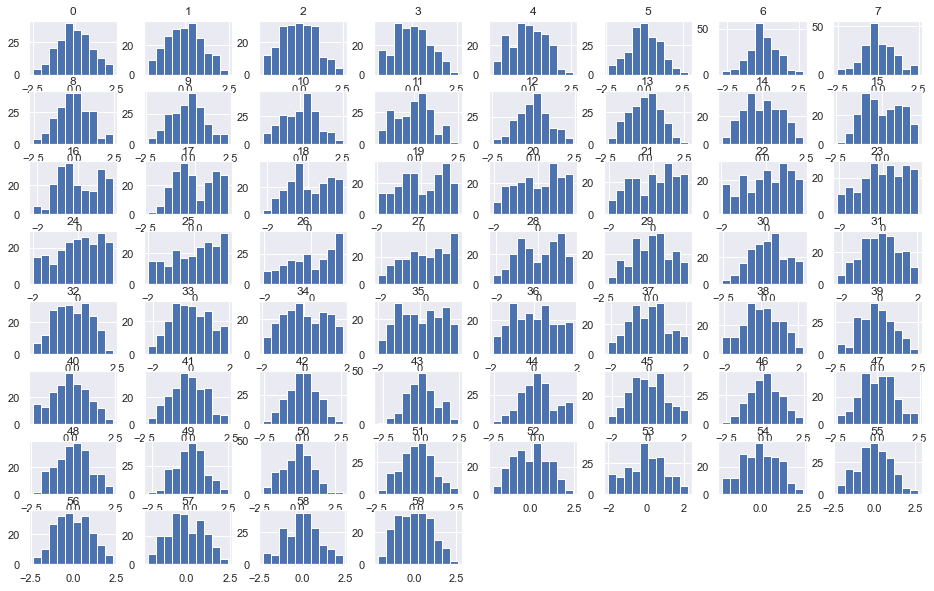

In [143]:
X, y = df.values[:, :-1], df.values[:, -1]
X_scaled = MinMaxScaler(feature_range=(1,4)).fit_transform(X)
X_tr = PowerTransformer(method='box-cox').fit_transform(X_scaled)
pd.DataFrame(X_tr).hist(figsize=(16, 10))

## Manual

In [144]:
from operator import itemgetter


def find_skewness(train, numeric_cols):
    """
    Calculate the skewness of the columns and segregate the positive
    and negative skewed data.
    """
    skew_dict = {}
    for col in numeric_cols:
        skew_dict[col] = train[col].skew()

    skew_dict = dict(sorted(skew_dict.items(), key=itemgetter(1)))
    positive_skew_dict = {k: v for (k, v) in skew_dict.items() if v > 0}
    negative_skew_dict = {k: v for (k, v) in skew_dict.items() if v < 0}
    return skew_dict, positive_skew_dict, negative_skew_dict


def add_constant(data, highly_pos_skewed):
    """
    Look for zeros in the columns. If zeros are present then the log(0) would result in -infinity.
    So before transforming it we need to add it with some constant.
    """
    C = 1
    for col in highly_pos_skewed.keys():
        if len(data[data[col] == 0]) > 0:
            data[col] = data[col] + C
    return data


def log_transform(data, highly_pos_skewed):
    """
    Log transformation of highly positively skewed columns.
    """
    for col in highly_pos_skewed.keys():
        data[col] = np.log10(data[col])
    return data


def sqrt_transform(data, moderately_pos_skewed):
    """
    Square root transformation of moderately skewed columns.
    """
    for col in moderately_pos_skewed.keys():
        data[col] = np.sqrt(data[col])
    return data


def reflect_sqrt_transform(data, moderately_neg_skewed):
    """
    Reflection and log transformation of highly negatively skewed
    columns.
    """
    for col in moderately_neg_skewed.keys():
        K = max(data[col]) + 1
        data[col] = np.sqrt(K - data[col])
    return data

In [145]:
df = pd.read_csv("../data/sonar.csv")
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [151]:
df.skew()

C:\Users\alanj\AppData\Local\Temp/ipykernel_10780/547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Freq_1     2.131088
Freq_2     2.155644
Freq_3     2.652518
Freq_4     3.401697
Freq_5     2.018141
Freq_6     1.248166
Freq_7     0.970820
Freq_8     1.481107
Freq_9     1.633870
Freq_10    1.281258
Freq_11    0.987813
Freq_12    0.588681
Freq_13    0.736584
Freq_14    1.022369
Freq_15    0.763964
Freq_16    0.694671
Freq_17    0.654480
Freq_18    0.525845
Freq_19    0.283182
Freq_20   -0.085331
Freq_21   -0.252741
Freq_22   -0.392289
Freq_23   -0.594350
Freq_24   -0.691861
Freq_25   -0.788909
Freq_26   -0.671580
Freq_27   -0.627843
Freq_28   -0.615447
Freq_29   -0.442007
Freq_30   -0.132390
Freq_31    0.259797
Freq_32    0.313420
Freq_33    0.423864
Freq_34    0.563296
Freq_35    0.591654
Freq_36    0.619868
Freq_37    0.676994
Freq_38    1.033366
Freq_39    0.908835
Freq_40    0.861280
Freq_41    0.863526
Freq_42    0.860110
Freq_43    0.909317
Freq_44    1.235086
Freq_45    1.366839
Freq_46    1.706674
Freq_47    1.790155
Freq_48    1.277722
Freq_49    1.273385
Freq_50    1.761714


In [156]:
X = df.drop('Label', axis=1)
numeric_cols = X.select_dtypes(['number']).columns
skew_dict, positive_skew_dict, negative_skew_dict = find_skewness(df, numeric_cols)

# sesgos positivos
moderate_pos_skew = {k: v for (k, v) in positive_skew_dict.items() if 0.2 < v <= 1}
highly_post_skew = {k: v for (k, v) in positive_skew_dict.items() if v > 1}

# # sesgos negativos
moderate_neg_skew = {k: v for (k, v) in negative_skew_dict.items() if -1 < v <= -0.2}
highly_neg_skew = {k: v for (k, v) in negative_skew_dict.items() if v < -1}

In [157]:
# positivas
X_tr = add_constant(X, highly_post_skew)
X_tr = log_transform(X_tr, highly_post_skew)
X_tr = sqrt_transform(X_tr, moderate_pos_skew)
# negativos
X_tr = reflect_sqrt_transform(X_tr, moderate_neg_skew)
X_tr = reflect_sqrt_transform(X_tr, highly_neg_skew)

array([[<AxesSubplot:title={'center':'Freq_1'}>,
        <AxesSubplot:title={'center':'Freq_2'}>,
        <AxesSubplot:title={'center':'Freq_3'}>,
        <AxesSubplot:title={'center':'Freq_4'}>,
        <AxesSubplot:title={'center':'Freq_5'}>,
        <AxesSubplot:title={'center':'Freq_6'}>,
        <AxesSubplot:title={'center':'Freq_7'}>,
        <AxesSubplot:title={'center':'Freq_8'}>],
       [<AxesSubplot:title={'center':'Freq_9'}>,
        <AxesSubplot:title={'center':'Freq_10'}>,
        <AxesSubplot:title={'center':'Freq_11'}>,
        <AxesSubplot:title={'center':'Freq_12'}>,
        <AxesSubplot:title={'center':'Freq_13'}>,
        <AxesSubplot:title={'center':'Freq_14'}>,
        <AxesSubplot:title={'center':'Freq_15'}>,
        <AxesSubplot:title={'center':'Freq_16'}>],
       [<AxesSubplot:title={'center':'Freq_17'}>,
        <AxesSubplot:title={'center':'Freq_18'}>,
        <AxesSubplot:title={'center':'Freq_19'}>,
        <AxesSubplot:title={'center':'Freq_20'}>,
       

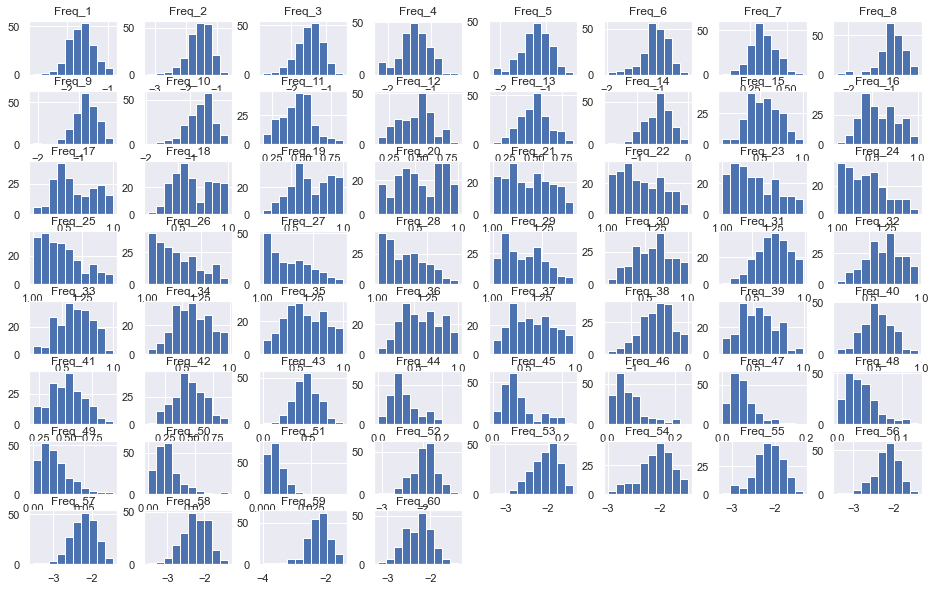

In [158]:
pd.DataFrame(X_tr).hist(figsize=(16, 10))

In [160]:
print(pd.DataFrame(X_tr).skew())

Freq_1    -0.250087
Freq_2    -0.768656
Freq_3    -0.568552
Freq_4    -0.285255
Freq_5    -0.413036
Freq_6    -0.753277
Freq_7     0.069381
Freq_8    -1.169348
Freq_9    -0.733183
Freq_10   -0.689334
Freq_11    0.222835
Freq_12   -0.082570
Freq_13   -0.000839
Freq_14   -0.656657
Freq_15    0.057552
Freq_16    0.220095
Freq_17    0.257433
Freq_18    0.171581
Freq_19   -0.102860
Freq_20   -0.085331
Freq_21    0.129080
Freq_22    0.270658
Freq_23    0.459926
Freq_24    0.533340
Freq_25    0.639311
Freq_26    0.543375
Freq_27    0.490254
Freq_28    0.467773
Freq_29    0.306694
Freq_30   -0.132390
Freq_31   -0.246130
Freq_32   -0.229881
Freq_33   -0.104318
Freq_34    0.000513
Freq_35    0.057685
Freq_36    0.078973
Freq_37    0.181308
Freq_38   -0.410035
Freq_39    0.258064
Freq_40    0.036300
Freq_41    0.185566
Freq_42    0.074218
Freq_43   -0.009389
Freq_44    0.967460
Freq_45    1.157291
Freq_46    1.392800
Freq_47    1.496349
Freq_48    1.104338
Freq_49    1.170471
Freq_50    1.698718


In [161]:
print(pd.DataFrame(X_tr).kurtosis())

Freq_1      0.747165
Freq_2      1.406418
Freq_3      0.679945
Freq_4      0.214461
Freq_5      0.157991
Freq_6      1.038206
Freq_7      0.451885
Freq_8      3.096296
Freq_9      1.758324
Freq_10     0.918137
Freq_11    -0.162307
Freq_12    -0.537926
Freq_13    -0.097243
Freq_14     0.579667
Freq_15    -0.529843
Freq_16    -0.877038
Freq_17    -1.040467
Freq_18    -1.105694
Freq_19    -0.979488
Freq_20    -1.210104
Freq_21    -1.095306
Freq_22    -1.042490
Freq_23    -0.790065
Freq_24    -0.500062
Freq_25    -0.458635
Freq_26    -0.731616
Freq_27    -0.770158
Freq_28    -0.676231
Freq_29    -0.880926
Freq_30    -0.689771
Freq_31    -0.374502
Freq_32    -0.529840
Freq_33    -0.611956
Freq_34    -0.684082
Freq_35    -0.931230
Freq_36    -0.968768
Freq_37    -0.973637
Freq_38    -0.104844
Freq_39    -0.491627
Freq_40    -0.096554
Freq_41    -0.445501
Freq_42    -0.286732
Freq_43     0.212798
Freq_44     0.594649
Freq_45     0.538240
Freq_46     1.848581
Freq_47     2.804668
Freq_48     1

In [163]:
print(X.shape)
print(X_tr.shape)

(208, 60)
(208, 60)


# Encoding

Codificación de categórico a numérico

## OrdinalEncoder

Se usa en la entrada (X)

In [50]:
X = np.asarray([['red'], ['green'], ['blue'], ['blue']])
X

array([['red'],
       ['green'],
       ['blue'],
       ['blue']], dtype='<U5')

In [51]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder() # primero ordena alfabéticamente de forma automática y después asigna números
encoder.fit_transform(X)

array([[2.],
       [1.],
       [0.],
       [0.]])

## OneHotEncoder

Equivalente a get_dummies de pandas.

In [52]:
from sklearn.preprocessing import OneHotEncoder

X = np.asarray([['red'], ['green'], ['blue'], ['blue']])
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit_transform(X)

array([[0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [53]:
# Probar con dataframe
# Probar varias columnas a la vez

# Discretización

In [82]:
from sklearn.preprocessing import KBinsDiscretizer

df = pd.read_csv("../data/sonar.csv")

X, y = df.values[:, :-1], df.values[:, -1]

y = LabelEncoder().fit_transform(y)

binner = KBinsDiscretizer(n_bins = 6, encode='ordinal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[
    ('binner', binner),
    ('model', model),
])
sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=sfold, n_jobs=4)
print('Accuracy: mean({:.4f}), std({:.4f})'.format(cv_results.mean(), cv_results.std()))

Accuracy: mean(0.8512), std(0.1196)


In [55]:
df.describe()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

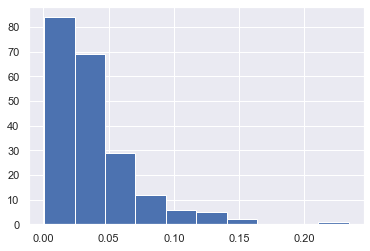

In [58]:
df['Freq_2'].hist()

In [61]:
# sin pipeline
X, y = df.values[:, :-1], df.values[:, -1]
binner = KBinsDiscretizer(n_bins = 10, encode='ordinal')
X_scaled = binner.fit_transform(X)
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.00000,208.00000,208.00000,208.00000,208.000000,208.00000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,4.519231,4.509615,4.509615,4.504808,4.50000,4.50000,4.50000,4.50000,4.504808,4.50000,...,4.504808,4.519231,4.509615,4.533654,4.533654,4.524038,4.528846,4.524038,4.533654,4.557692
std,2.884176,2.885898,2.890916,2.882561,2.88926,2.88926,2.88926,2.88926,2.882561,2.88926,...,2.887584,2.872427,2.887572,2.880691,2.873975,2.895841,2.875708,2.900841,2.877335,2.880308
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,2.00000,2.00000,2.000000,2.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,5.000000,5.000000,4.500000,4.500000,4.50000,4.50000,4.50000,4.50000,4.500000,4.50000,...,4.500000,4.500000,4.500000,5.000000,5.000000,4.500000,4.500000,5.000000,4.500000,5.000000
75%,7.000000,7.000000,7.000000,7.000000,7.00000,7.00000,7.00000,7.00000,7.000000,7.00000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
max,9.000000,9.000000,9.000000,9.000000,9.00000,9.00000,9.00000,9.00000,9.000000,9.00000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


<AxesSubplot:>

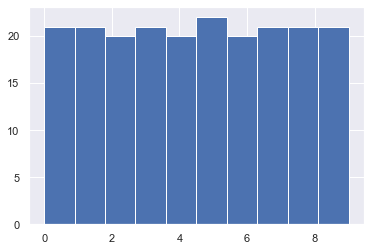

In [62]:
pd.DataFrame(X_scaled)[1].hist()

array([[<AxesSubplot:title={'center':'Freq_1'}>,
        <AxesSubplot:title={'center':'Freq_2'}>,
        <AxesSubplot:title={'center':'Freq_3'}>,
        <AxesSubplot:title={'center':'Freq_4'}>,
        <AxesSubplot:title={'center':'Freq_5'}>,
        <AxesSubplot:title={'center':'Freq_6'}>,
        <AxesSubplot:title={'center':'Freq_7'}>,
        <AxesSubplot:title={'center':'Freq_8'}>],
       [<AxesSubplot:title={'center':'Freq_9'}>,
        <AxesSubplot:title={'center':'Freq_10'}>,
        <AxesSubplot:title={'center':'Freq_11'}>,
        <AxesSubplot:title={'center':'Freq_12'}>,
        <AxesSubplot:title={'center':'Freq_13'}>,
        <AxesSubplot:title={'center':'Freq_14'}>,
        <AxesSubplot:title={'center':'Freq_15'}>,
        <AxesSubplot:title={'center':'Freq_16'}>],
       [<AxesSubplot:title={'center':'Freq_17'}>,
        <AxesSubplot:title={'center':'Freq_18'}>,
        <AxesSubplot:title={'center':'Freq_19'}>,
        <AxesSubplot:title={'center':'Freq_20'}>,
       

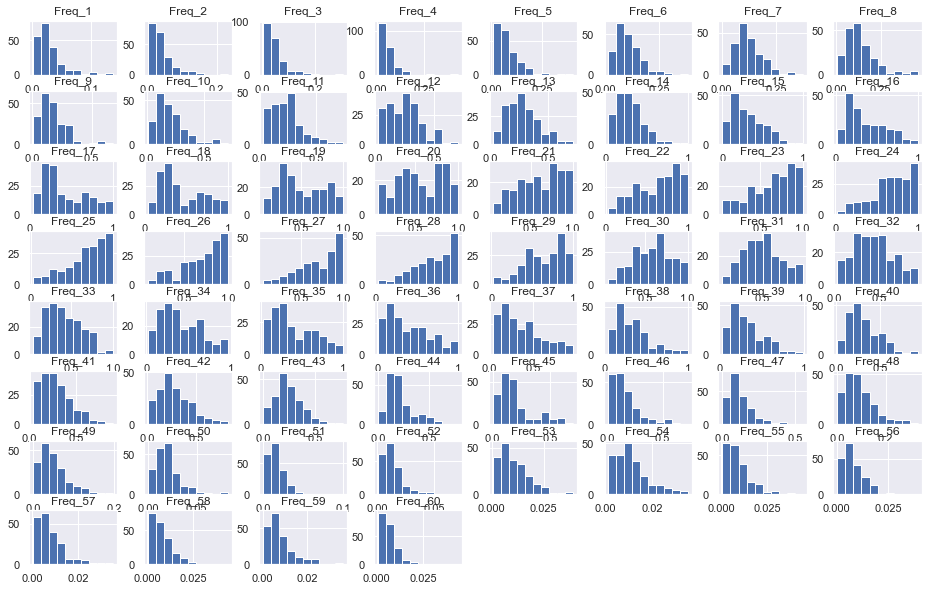

In [63]:
df.hist(figsize=(16,10))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>],
       [<AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubpl

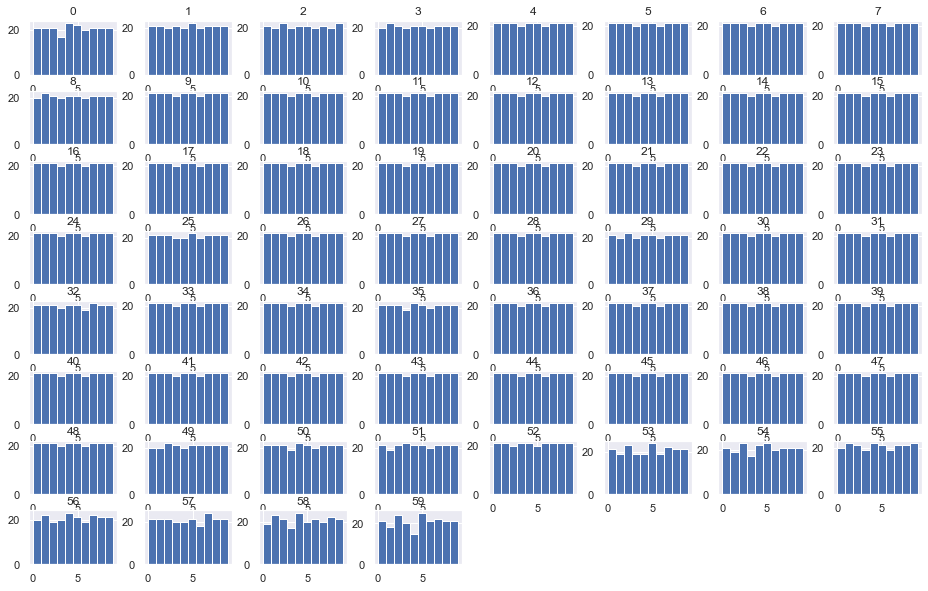

In [64]:
pd.DataFrame(X_scaled).hist(figsize=(16,10))

In [75]:
def get_dataset():
    df = pd.read_csv('../data/sonar.csv')
    X, y = df.values[:, :-1], df.values[:, -1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X, y

def get_models():
    models = dict()
    for i in range(2, 10):
        binner = KBinsDiscretizer(n_bins = i, encode='ordinal')
        model = KNeighborsClassifier()
        pipeline = Pipeline(steps=[
            ('binner', binner),
            ('model', model),
        ])
        models[str(i)] = pipeline
    return models

def evaluate_model(model, X, y):
    sfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=sfold, n_jobs=4)
    return cv_results

{'whiskers': [<matplotlib.lines.Line2D at 0x252c9a26730>,
 'caps': [<matplotlib.lines.Line2D at 0x252c9a26e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x252c9a264f0>,
 'medians': [<matplotlib.lines.Line2D at 0x252c9a425e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x252c9a42d00>,
 'means': [<matplotlib.lines.Line2D at 0x252c9a42970>,
  <matplotlib.lines.Line2D at 0x252c9a59430>]}

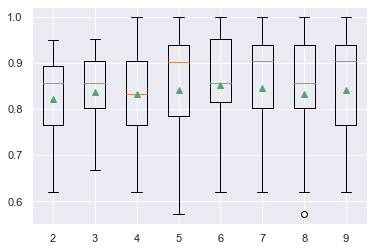

In [76]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()

for name, model in models.items():
    cv_results = evaluate_model(model, X, y)
    results.append(cv_results)
    names.append(name)

plt.boxplot(results, labels=names, showmeans=True)

# Binarización

In [87]:
df = pd.read_csv('../data/student-por.csv', sep=';')
df.age = df.age.apply(lambda value: np.nan if value == '?' else value)
df['age'] = SimpleImputer(strategy='median').fit_transform(pd.DataFrame(df['age'])).astype(int)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4.0,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,NaN,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,NaN,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,NaN,3,2,1,2,5,0,11,13,13


In [89]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=17)
df['adult'] = binarizer.fit_transform(pd.DataFrame(df["age"]))
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,adult
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,0
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,0
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,0


<AxesSubplot:>

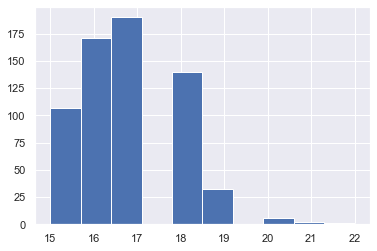

In [90]:
df["age"].hist()

<AxesSubplot:xlabel='adult', ylabel='count'>

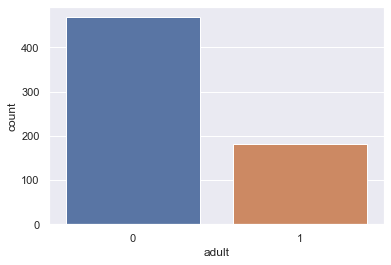

In [91]:
sns.countplot(data=df, x='adult')